## Pokemon Dataset Analysis

In this Portfolio task, I have used the data Pokemon with Stats from Kaggle to try to perform a __Logistic Regression__ analysis to classify whether a Pokemon would be classified as a Legendary Pokemon or not.

The second question would be to perform __KNN Classification__ to classify whether a Pokemon is common, uncommon, rare, or legendary based on their statistics.

The dataset I used to perform the logistic regression analysis and KNN classification is from the Pokemon dataset obtained through Kaggle: https://www.kaggle.com/datasets/abcsds/pokemon (10/10/2023).

The header of the csv file is shown below. 

| Name | Type 1 | Type 2 | Total | HP | Attack | Defense | Sp. Atk | Sp. Def | Speed | Generation | Legendary
    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
    
#### Description of Fields

* __Name__ - Name of each pokemon
* __Type 1__ - Each pokemon has a type, this determines weakness/resistance to attacks
* __Type 2__ - Some pokemon are dual type and have 2
* __Total__ - Sum of all stats that come after this, a general guide to how strong a pokemon is
* __HP__ - Hit points, or health, defines how much damage a pokemon can withstand before fainting
* __Attack__ - The base modifier for normal attacks (eg. Scratch, Punch)
* __Defense__ - The base damage resistance against normal attacks
* __Sp. Atk__ - Special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
* __Sp. Def__ - The base damage resistance against special attacks
* __Speed__ - Determines which pokemon attacks first each round
* __Generation__ - The generation of the pokemon
* __Legendary__ - Pokemon that are hard to catch, and are stronger than most Pokemon

My goal in this notebook is to try to build and evaluate predictive logistic regression model for whether or not a Pokemon is __legendary__ or not based on their statistic points.

In [1]:
# importing packages

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.datasets import make_classification

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import RFE, RFECV

from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
import warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# analysing the dataset

df = pd.read_csv('Pokemon.csv')
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


### Cleaning the Dataset

In [3]:
## count for null values in each column

df.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [4]:
## replace all NaN values with 'None' for Type 2 

df = df.where(pd.notnull(df), None)
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,None,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,None,314,44,48,65,50,64,43,1,False


In [5]:
df.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [6]:
# converting non-numerical variable into numerical variable

ord_enc = OrdinalEncoder()

df["Name_Code"] = ord_enc.fit_transform(df[["Name"]])
df["Type1_Code"] = ord_enc.fit_transform(df[["Type 1"]])
df["Type2_Code"] = ord_enc.fit_transform(df[["Type 2"]])
df["Legendary_Code"] = ord_enc.fit_transform(df[["Legendary"]])

In [7]:
# separate coded values with uncoded values

column_names = ['PokemonId', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack',
               'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']

df_coded = pd.DataFrame(columns = column_names)

df_coded['PokemonId']=df['#']
df_coded['Name']=df['Name_Code']
df_coded['Type 1']=df['Type1_Code']
df_coded['Type 2']=df['Type2_Code']
df_coded['Total']=df['Total']
df_coded['HP']=df['HP']
df_coded['Attack']=df['Attack']
df_coded['Defense']=df['Defense']
df_coded['Sp. Atk']=df['Sp. Atk']
df_coded['Sp. Def']=df['Sp. Def']
df_coded['Speed']=df['Speed']
df_coded['Generation']=df['Generation']
df_coded['Legendary']=df['Legendary_Code']

In [8]:
# describing the overall shape of the data

df_coded.describe()

,PokemonId,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,800.000000,800.0000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000
mean,362.813750,399.5000,9.467500,13.235000,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,0.08125
std,208.343798,231.0844,5.580356,5.595213,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,0.27339
min,1.000000,0.0000,0.000000,0.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,0.00000
25%,184.750000,199.7500,5.000000,7.000000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,0.00000
50%,364.500000,399.5000,10.000000,16.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,0.00000
75%,539.250000,599.2500,14.000000,18.000000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,0.00000
max,721.000000,799.0000,17.000000,18.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,1.00000


Based on the general description of the Pokemon dataset, we could generally predict the statistical value of Legendary Pokemon to be within the 75th percentile of the average statistic of all Pokemon, that is to say, their __HP__ to be above 80, their __Attack__ to be above 100, their __Defense__ to be above 90, their __Sp. Attack__ to be above 95, their __Sp. Def__ to be above 90, and their __Speed__ to be above 90.

### Observing Statistical Differences Between Legendary and Non-Legendary Pokemon

In [9]:
# splitting df_coded for legendary pokemon and non-legendary pokemon

df_coded_legendary = df_coded.loc[df_coded['Legendary'] == 1]
df_coded_non_legendary = df_coded.loc[df_coded['Legendary'] == 0]

In [10]:
# comparing desc statistics

df_coded_legendary.describe()

,PokemonId,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.0
mean,470.215385,436.446154,9.276923,11.584615,637.384615,92.738462,116.676923,99.661538,122.184615,105.938462,100.184615,3.769231,1.0
std,173.651095,221.879685,5.464395,6.036069,60.937389,21.722164,30.348037,28.255131,31.104608,28.827004,22.952323,1.455262,0.0
min,144.000000,26.000000,1.000000,1.000000,580.000000,50.000000,50.000000,20.000000,50.000000,20.000000,50.000000,1.000000,1.0
25%,381.000000,286.000000,3.000000,7.000000,580.000000,80.000000,100.000000,90.000000,100.000000,90.000000,90.000000,3.000000,1.0
50%,483.000000,376.000000,10.000000,11.000000,600.000000,91.000000,110.000000,100.000000,120.000000,100.000000,100.000000,4.000000,1.0
75%,642.000000,613.000000,14.000000,18.000000,680.000000,105.000000,131.000000,115.000000,150.000000,120.000000,110.000000,5.000000,1.0
max,721.000000,799.000000,17.000000,18.000000,780.000000,150.000000,190.000000,200.000000,194.000000,200.000000,180.000000,6.000000,1.0


In [11]:
df_coded_non_legendary.describe()

,PokemonId,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.0
mean,353.315646,396.232653,9.484354,13.380952,417.213605,67.182313,75.669388,71.559184,68.454422,68.892517,65.455782,3.284354,0.0
std,208.590419,231.742802,5.593833,5.535288,106.760417,24.808849,30.490153,30.408194,29.091705,25.669310,27.843038,1.673471,0.0
min,1.000000,0.000000,0.000000,0.000000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.0
25%,175.500000,195.500000,5.000000,8.000000,324.000000,50.000000,54.500000,50.000000,45.000000,50.000000,45.000000,2.000000,0.0
50%,346.000000,401.000000,10.000000,17.000000,425.000000,65.000000,72.000000,66.000000,65.000000,65.000000,64.000000,3.000000,0.0
75%,533.500000,598.500000,14.000000,18.000000,498.000000,79.500000,95.000000,85.000000,85.000000,85.000000,85.000000,5.000000,0.0
max,715.000000,798.000000,17.000000,18.000000,700.000000,255.000000,185.000000,230.000000,175.000000,230.000000,160.000000,6.000000,0.0


We can infer from the descriptive statistics that we have collected that the Logistic Regression is likely to produce an accurate result because the mean of the Total Statistics of Legendary Pokemon and Non-Legendary Pokemon is significantly high and there are 220 total point differences between Legendary Pokemon and Non-Legendary Pokemon.

### Studying the Correlation on Legendary Pokemon

<Axes: >

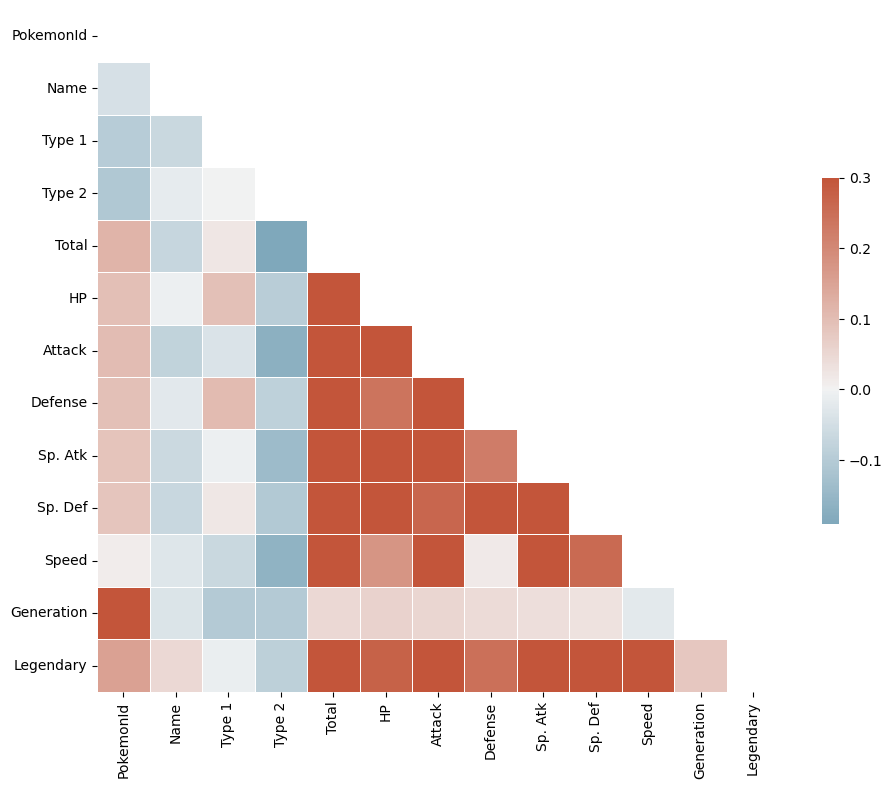

In [12]:
# correlation plot between all data
# shows the correlation between all values to each other

corr = df_coded.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [13]:
# study the correlation between these features

sns.pairplot(df_coded, hue='Legendary')

Based on the correlation model, we could analyze that Legendary attributes have strong correlation with all attribute values that determines the strength of Pokemon, that is Total, HP, Attack, Defense, Sp. Atk, Sp. Def, and Speed.

Legendary itself does not have any correlation with non-strength determinants of Pokemon such as their ID number shown in the (#) column, and their Generation, meaning whether or not a Pokemon is Legendary is strongly determined by their strength instead of their ID or generation.

As such, we could __drop__ the variables PokemonId, Name, Type 1, Type 2, and Generation when performing a Logistic Regression analysis, as according to the correlation model, it is unlikely that they will contribute much to the final analysis.

### Performing Logistic Regression

In [ ]:
# check how many classes we do have from the "legendary" column

set(df['Legendary'])

In [ ]:
# check number of samples for each class and comment whether dataset is balanced

print("No. of Legendary Pokemon: ", df[df['Legendary'] == True].shape[0])
print("No. of Non-Legendary Pokemon: ", df[df['Legendary'] == False].shape[0])

The quantity of Legendary Pokemon, which makes up 8.85% of all the Pokemon in the dataset, is significantly lower than that of Non-Legendary Pokemon because they are a class of highly rare and frequently extremely powerful Pokemon that are frequently prominently featured in the legends and myths of the Pokemon world. Therefore, to balance the dataset, we could utilise up-sampling or under-sampling strategies.

In [ ]:
# split your data into training(80%) and testing data (20%) and use random_state=42

train, test = train_test_split(df_coded, test_size=0.2, random_state=42)
print(train.shape)
print(test.shape)

(640, 13)
(160, 13)


In [ ]:
# getting input data and targets for building prediction model

X_train = train.drop(['Legendary', 'PokemonId'], axis=1)
y_train = train['Legendary']
X_test = test.drop(['Legendary', 'PokemonId'], axis=1)
y_test = test['Legendary']

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)
print(X_train.head())
print(y_train.head())

X_train shape:  (640, 11)
y_train shape:  (640,)
X_test shape:  (160, 11)
y_test shape:  (160,)
      Name  Type 1  Type 2  Total   HP  Attack  Defense  Sp. Atk  Sp. Def  \
264  678.0    17.0    18.0    580  100      75      115       90      115   
615  144.0     6.0    18.0    480  105     140       55       30       55   
329  432.0    16.0     4.0    480   50     105      125       55       95   
342  755.0     0.0    18.0    400   65      73       55       47       75   
394  783.0    14.0    18.0    260   95      23       48       23       48   

     Speed  Generation  
264     85           2  
615     95           5  
329     50           3  
342     85           3  
394     23           3  
264    1.0
615    0.0
329    0.0
342    0.0
394    0.0
Name: Legendary, dtype: float64


In [ ]:
# training Logistic Regression model

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# doing predictions on train and test set

y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

### Evaluation on Logistic Regression

In [ ]:
# evaluate the performance of your trained model
print("Accuracy score on training set: ", accuracy_score(y_train, y_hat_train))
print("Accuracy score on testing set: ", accuracy_score(y_test, y_hat_test))

Accuracy score on training set:  0.903125
Accuracy score on testing set:  0.91875


In [ ]:
# checking confusion matrix

print("Confusion matrix on test set: ")
print(confusion_matrix(y_test, y_hat_test))

Confusion matrix on test set: 
[[146   4]
 [  9   1]]


In [ ]:
print("Confusion matrix on train set: ")
print(confusion_matrix(y_train, y_hat_train))

Confusion matrix on train set: 
[[571  14]
 [ 48   7]]


The data has high accuracy on both the training set and the testing set according to the logistic regression model we have run, with very few false positives and false negatives.

Additionally, the model is very accurate, scoring 90.47% on the testing set's accuracy value and 91.87% on the training set. Only a small number of Pokemon are classified as false positives or false negatives, which is another encouraging outcome from the confusion matrix.

### Feature Selection

In [23]:
# creating RFE object

lr_model = LogisticRegression()
rfe = RFE(estimator=lr_model, n_features_to_select=5, step=1)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [24]:
# doing evaluation

y_test_hat = rfe.predict(X_test)
print("accuracy score on test set: ", accuracy_score(y_test, y_test_hat))

accuracy score on test set:  0.94375


In [25]:
# summarize all features

for i in range(X_train.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 7.000
Column: 1, Selected False, Rank: 4.000
Column: 2, Selected False, Rank: 2.000
Column: 3, Selected False, Rank: 5.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 6.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected False, Rank: 3.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected True, Rank: 1.000


In [26]:
# to increment number of features, one at each time

acc_scores = []
for i in range(1,10):
    clf = LogisticRegression()
    rfe = RFE(estimator=clf, n_features_to_select=i)
    # training model
    rfe.fit(X_train, y_train)
    # predicting on test set
    y_pred = rfe.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    # print this
    print("Acc on test set using", i, "features: ", acc_score)
    # append to the list
    acc_scores.append(acc_score)

Acc on test set using 1 features:  0.9375
Acc on test set using 2 features:  0.9375
Acc on test set using 3 features:  0.93125
Acc on test set using 4 features:  0.93125
Acc on test set using 5 features:  0.94375
Acc on test set using 6 features:  0.95
Acc on test set using 7 features:  0.95
Acc on test set using 8 features:  0.95
Acc on test set using 9 features:  0.90625


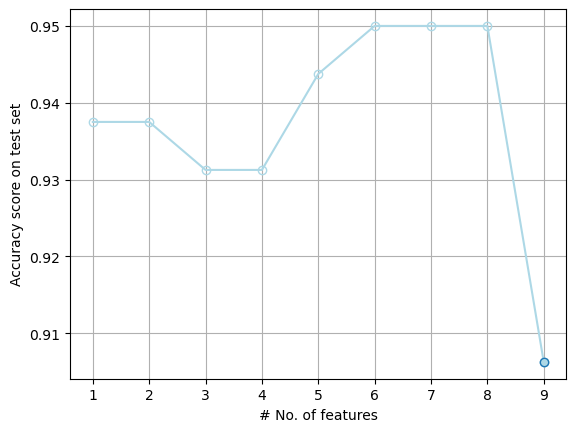

In [27]:
# estimating accuracy score on test set using RFE by using different number of features

estimator = LogisticRegression()
acc_scores = []
for i in range(1, 10):
    selector = RFE(estimator, n_features_to_select=i)
    selector = selector.fit(X_train, y_train)
    supp = selector.get_support()

    predicted = selector.predict(X_test)
    acc_score = accuracy_score(y_test, predicted)
    acc_scores.append(acc_score)
  
best = 1
for item in acc_scores:
    if item < acc_scores[best - 1]:
        best = acc_scores.index(item) + 1

plt.grid()   
plt.xlabel('# No. of features')
plt.ylabel('Accuracy score on test set')
plt.plot(range(1, 10), acc_scores, marker = 'o', color = 'lightblue', markeredgewidth = 1 ,markeredgecolor = 'lightblue', markerfacecolor = 'None')
plt.plot(best, acc_scores[best-1], marker = 'o', markerfacecolor = 'lightblue')

With the best accuracy on the test set of 95.62%, we were able to choose 7 characteristics using this. We may rerun the rank summary of all characteristics using the 7 features to chose to determine which features we ought to choose.

In [28]:
# creating RFE object

lr_model = LogisticRegression()
rfe = RFE(estimator=lr_model, n_features_to_select=7, step=1)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=7)

In [29]:
# doing evaluation

y_test_hat = rfe.predict(X_test)
print("accuracy score on test set: ", accuracy_score(y_test, y_test_hat))

accuracy score on test set:  0.95


In [30]:
# summarize all features

for i in range(X_train.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 5.000
Column: 1, Selected False, Rank: 2.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected False, Rank: 3.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 4.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected True, Rank: 1.000


The highest accuracy on the testing set would be obtained by running another logistic regression using only the columns that rank first on the RFE, but since this would only result in a slight improvement over our current model (91.89% accuracy score), we would move on to the KNN classification section instead.

### KNN Classification Data Preparation

Remember that we previously conducted a descriptive analysis of the Pokemon's overall statistics and determined the percentile of each Pokemon's total statistics, with the 25th percentile Pokemon having a 330 Total, the 50th percentile Pokemon having a 450 Total, and the 75th percentile Pokemon having above 515 Total.

To define a Pokemon based on their overall statistics and where they sit inside the range, we will add a column called "Ranking."

In [31]:
def ranking(x):
    if x in range(0, 330):
        return 'Common'
    if x in range(331, 450):
        return 'Uncommon'
    if x in range(451, 515):
        return 'Rare'
    if x >= 516:
        return 'Legendary'

df_coded['Ranking'] = df_coded['Total'].apply(lambda x : ranking(x))
df_coded

,PokemonId,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Ranking
0,1,80.0,9.0,13.0,318,45,49,49,65,65,45,1,0.0,Common
1,2,329.0,9.0,13.0,405,60,62,63,80,80,60,1,0.0,Uncommon
2,3,745.0,9.0,13.0,525,80,82,83,100,100,80,1,0.0,Legendary
3,3,746.0,9.0,13.0,625,80,100,123,122,120,80,1,0.0,Legendary
4,4,102.0,6.0,18.0,309,39,52,43,60,50,65,1,0.0,Common
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,160.0,15.0,4.0,600,50,100,150,100,150,50,6,1.0,Legendary
796,719,161.0,15.0,4.0,700,50,160,110,160,110,110,6,1.0,Legendary
797,720,314.0,14.0,8.0,600,80,110,60,150,130,70,6,1.0,Legendary
798,720,315.0,14.0,1.0,680,80,160,60,170,130,80,6,1.0,Legendary


In [32]:
# filter the data for KNN analysis

df_knn = df_coded.copy()
df_knn.drop(['PokemonId', 'Name', 'Type 1', 'Type 2', 'Total', 'Generation', 'Legendary'],axis=1, inplace=True)

In [33]:
df_knn

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Ranking
0,45,49,49,65,65,45,Common
1,60,62,63,80,80,60,Uncommon
2,80,82,83,100,100,80,Legendary
3,80,100,123,122,120,80,Legendary
4,39,52,43,60,50,65,Common
...,...,...,...,...,...,...,...
795,50,100,150,100,150,50,Legendary
796,50,160,110,160,110,110,Legendary
797,80,110,60,150,130,70,Legendary
798,80,160,60,170,130,80,Legendary


In [34]:
# code the ranking of each pokemon

# common: 0.0 uncommon: 3.0 rare: 2.0 legendary: 1.0

df_knn["Ranking"] = ord_enc.fit_transform(df_coded[["Ranking"]])
df_knn

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Ranking
0,45,49,49,65,65,45,0.0
1,60,62,63,80,80,60,3.0
2,80,82,83,100,100,80,1.0
3,80,100,123,122,120,80,1.0
4,39,52,43,60,50,65,0.0
...,...,...,...,...,...,...,...
795,50,100,150,100,150,50,1.0
796,50,160,110,160,110,110,1.0
797,80,110,60,150,130,70,1.0
798,80,160,60,170,130,80,1.0


Remember from the descriptive statistics that not all statistics of Pokemon have the same scale of 0 to 100. As a result, we will need to standardise the dataset in order to perform a more accurate KNN analysis when classifying types of Pokemon to ensure that none of the values have a greater impact on the outcome than the others.

In [35]:
# standardizing the dataset

from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
scaler.fit(df_knn.drop('Ranking', axis=1))
scaled_data= scaler.transform(df_knn.drop('Ranking', axis=1))
scaled= pd.DataFrame(scaled_data, columns=df_knn.columns[:-1])

In [36]:
X = scaled
y = df_knn['Ranking']

In [37]:
scaled.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503
1,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015
2,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635
3,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635
4,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853


### KNN Classification Performance

In [38]:
# splitting the train test data set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=142)

In [39]:
# build knn classifier model

from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=4)

In [40]:
# train the model with the training data

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [41]:
# predicting the result on test data

predictions = knn.predict(X_test)

In [42]:
# Build a KNN classifier model
clf_knn = KNeighborsClassifier(n_neighbors=4)

# Train the model with the training data
clf_knn.fit(X_train, y_train)

X_train

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
357,0.420917,-1.048222,-0.283741,0.525353,1.369846,0.403635
767,0.499291,1.294776,1.449028,-0.116813,-0.463927,0.093743
704,0.381730,1.109803,-0.123299,1.595629,0.291156,1.471044
233,-0.558757,0.493224,-0.604624,-1.156510,0.111375,1.608774
4,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853
...,...,...,...,...,...,...
268,1.204656,2.620420,2.443765,0.678249,1.729409,0.093743
511,0.812786,1.633894,0.999791,1.809684,1.190065,-1.317991
411,-0.362822,-0.123354,0.839350,-0.544924,0.291156,-0.629341
197,0.224982,0.030790,0.678908,0.525353,1.010283,-0.629341


### Predicting the Classification of New Pokemon

Using this model, we can now make predictions about fresh data for which we might not be familiar with the proper labels. Suppose we come across a Pokemon that scores on the 0.42 scale for HP, 0.42 for Attack, 0.42 for Defence, 0.42 for Special Attack, 0.42 for Special Defence, and 0.42 for Speed. We could try to enter it into the KNN Classification model to determine which rarity category it would belong to.

In [43]:
# Produce the features of a testing data instance
X_new = np.array([[0.42, 0.42, 0.42, 0.42, 0.42, 0.42]])
print("X_new.shape: {}".format(X_new.shape))

# Predict the result label of X_new:
y_new_pred = clf_knn.predict(X_new)
print("The predicted class is: \n", y_new_pred)

X_new.shape: (1, 6)
The predicted class is: 
 [2.]


### Performing Evaluation on KNN Classification Model

In [44]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, predictions):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, predictions, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, predictions, pos_label=None,
                              average='weighted')
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, predictions, pos_label=None, average='weighted')
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, predictions)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, predictions)
print("Accuracy = %.3f, Precision = %.3f, Recall = %.3f, F1 = %.3f" % (accuracy, precision, recall, f1))

Accuracy = 0.863, Precision = 0.845, Recall = 0.863, F1 = 0.848


According to the model's evaluation, it is 86.3% accurate, 84.5% precise, 86.3% recall, and 84.8% harmonic, which means that we are doing an excellent job at classifying the ranking of a Pokemon based on the information we have collected using the present model.

### Parameter Tuning with Cross-Validation CV

We will perform a cross-validation CV to see whether the model we previously created has sufficient values of K to categorise the Pokemon into different ranks of rarity.

We will perform a cross validation on 1, to 20 groups of K with a step of 1 to go over all possible iteration values in order to find the value of K that delivers the most accurate result because the first classification only considers 4 categories of rarity.

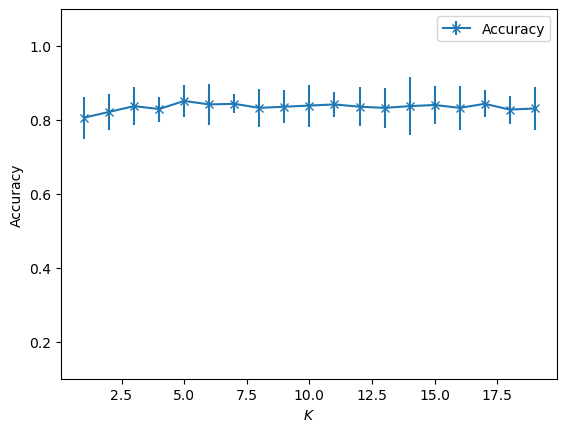

In [45]:
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt

cv_scores = []
cv_scores_std = []
k_range = range(1, 20)
for i in k_range:
    clf = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))
    cv_scores.append(scores.mean())
    cv_scores_std.append(scores.std())

# plot the relationship
plt.errorbar(k_range, cv_scores, yerr=cv_scores_std, marker='x', label='Accuracy')
plt.ylim([0.1, 1.1])
plt.xlabel('$K$')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [46]:
from sklearn.model_selection import GridSearchCV
parameter_grid = {'n_neighbors': range(1, 20)}
knn_clf = KNeighborsClassifier()
gs_knn = GridSearchCV(knn_clf, parameter_grid, scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))
gs_knn.fit(X_train, y_train)

print('Best K value: ', gs_knn.best_params_['n_neighbors'])
print('The accuracy: %.4f\n' % gs_knn.best_score_)

Best K value:  11
The accuracy: 0.8453



Here, we can see that there aren't many differences between different values of K, from 3 to 4, but we can also note that, when re-modelling our data to get a more accurate result on classifying the rank of Pokemon based on their power statistics, we should reduce the potential ranking of Pokemon from 4 to 3 instead.

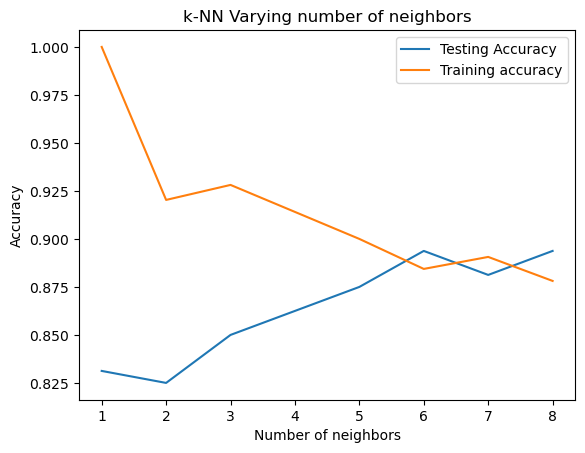

In [47]:
# set up arrays to store training and test accuracies

neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # set up a knn classifier with k neighbors
    
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the model
    
    knn.fit(X_train, y_train)
    
    # compute accuracy on the training set
    
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # compute accuracy on the test set
    
    test_accuracy[i] = knn.score(X_test, y_test) 

# visualise accuracy plot 

plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

Our current classification of five different rankings of Pokemon based on the kNN model is quite satisfactory, as it scores above 80%, meaning that 80% of the Pokemon classification could be described by the model. This is based on the illustrated graph of KNN varying number of neighbours, where we reach the highest intersection of training accuracy at kNN approximately 5.5.

### Parameter Tuning with Grid Search CV

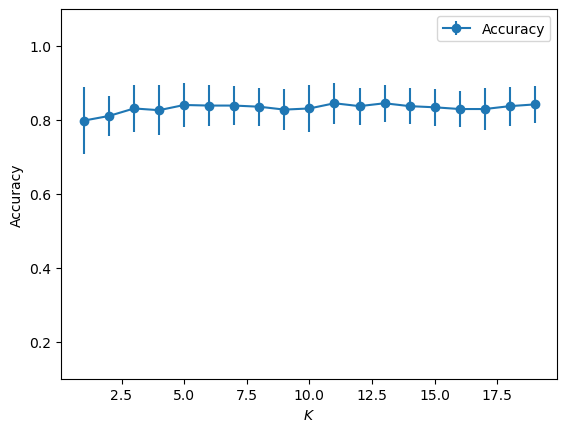

In [48]:
# got the statistics
cv_scores_means = gs_knn.cv_results_['mean_test_score']
cv_scores_stds = gs_knn.cv_results_['std_test_score']

# plot the relationship
plt.errorbar(k_range, cv_scores_means, yerr=cv_scores_stds, marker='o', label='Accuracy')
plt.ylim([0.1, 1.1])
plt.xlabel('$K$')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

Additionally, there is a little improvement between each GridSearchCV search value, so we may either leave the K-Value at its current value or lower it to 3. However, the improvement is insignificant enough to leave the model in its current state.

### Overall Evaluation

During our initial stage, we __cleaned the dataset__ by removing the NaN values from Type 2 Pokemon, and using an Ordinal Encoder to code the non integer value before performing Logistic Regression and KNN Clustering, as the analysis require numeric values.

Initial __descriptive analysis__ showed that legendary Pokemon typically have higher strength statistical attributes than non-legendary Pokemon, therefore our initial assumption was that we could sort the Pokemon based on their strength attributes.

After that, we trained a __Logistic Regression__ to classify whether a Pokemon is a legendary Pokemon or not, and we landed on a significantly accurate result proving our initial theorem that Pokemon could be classified as legendary or non-legendary based on their total strength point value.

We then attempt to extend our logistic regression further into __KNN Clustering__ where we create our own category of Pokemon based on their strength that goes from common, uncommon, rare, to legendary, and train a KNN Clustering model that clusters the Pokemon into 4 groups. This model was then again, proven to be significantly accurate on both the training and testing set.

Therefore we have come to our final conclusion that Pokemons could be clustered based on their power level and strength indicator.